In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [106]:
class MultiLayerPerceptron:
  def __init__ (self, features, hidden_layers, hidden_neurons, output_neurons, f_activation, learning_rate):
    self.features = features
    self.h_layers = hidden_layers
    self.h_neurons = hidden_neurons
    self.o_neurons = output_neurons
    self.fa = f_activation
    self.l_rate = learning_rate
    self.generate_layers()
  
  # esta funcion construye una matrix de pesos aleatoriamente agregando una columna adicional
  # de bias
  # neuron_count: numero de perceptrones
  # input_count: numero de features de un elemento
  def layer_w (self, neuron_count, input_count):
    weights = np.zeros((neuron_count, input_count+1))
    for i in range(neuron_count):
      for j in range(1, (input_count+1)):
        weights[i][j] = np.random.uniform(-0.1, 0.1)
    return weights

  def generate_layers (self):
    # Generation for hidden layers
    self.hidden_layer_w = self.layer_w (self.h_neurons, self.features)
    self.hidden_layer_y = np.zeros (self.h_neurons)
    self.hidden_layer_error = np.zeros (self.h_neurons)

    # Generation for output layer
    self.output_layer_w = self.layer_w (self.o_neurons, self.h_neurons)
    self.output_layer_y = np.zeros (self.o_neurons)
    self.output_layer_error = np.zeros (self.o_neurons)

  #parametro x es una muestra del dataset (1, n) donde n es el num de features
  def forward_pass (self, x):
    for i, w in enumerate (self.hidden_layer_w):
      z = np.dot (w, x)
      self.hidden_layer_y [i] = np.tanh(z)
    hidden_output_array = np.concatenate((np.array([1.0]), self.hidden_layer_y))

    for i, w in enumerate (self.output_layer_w):
      z = np.dot (w, hidden_output_array)
      self.output_layer_y [i] = 1.0 / (1.0 + np.exp(-z))

  #y_valid: one hot encoding(1,25) representando una letra
  def backward_pass (self, y_truth):
    #calculamos el error con respecto a la capa de salida
    for i, y in enumerate (self.output_layer_y):
      error_prime = -(y_truth[i] - y)
      derivative = y * (1.0 - y)
      self.output_layer_error[i] = error_prime * derivative

    #iteramos la capa hidden, i -> neural 
    #guardamos pesos relacionados a neural i de la capa output
    for i,y in enumerate(self.hidden_layer_y):
      error_weights = []
      for w in self.output_layer_w:
          error_weights.append(w[i+1])
      error_weight_array = np.array(error_weights)
      
      derivative = 1.0 - y**2#derivada de la funcion tanh
      #calculamos el error propagado de neural i 
      weighted_error = np.dot(error_weight_array, self.output_layer_error)
      #calculamos el error con respecto a la funcion de activacion
      self.hidden_layer_error[i] = weighted_error * derivative

  # x es una muestra de (1,785)
  def adjust_weights(self, x):
    for i, error in enumerate (self.hidden_layer_error):
      self.hidden_layer_w [i] -= (x * self.l_rate * error)

    hidden_output_array = np.concatenate ((np.array([1.0]), self.hidden_layer_y))
    
    for i, error in enumerate (self.output_layer_error):
      self.output_layer_w [i] -= (hidden_output_array * self.l_rate * error)

  def training (self, x_data, y_data):
    index_list = list(range(len(x_data)))
    for i in range(10):
      np.random.shuffle(index_list)
      correct_training_results = 0
      for j in index_list:
        x = np.concatenate((np.array([1.0]), x_data[j]))
        self.forward_pass (x)
        if self.output_layer_y.argmax() == y_data[j].argmax():
          correct_training_results +=1
        self.backward_pass (y_data[j])
        self.adjust_weights (x)

      print('epoch no:', i, ', train_acc: ', '%6.4f' % (correct_training_results/len(x_data)))


In [107]:
np.random.seed(7)

df = pd.read_csv('data/sign_mnist_train.csv')

imgs =df.iloc[:,1:]
y = df.iloc[:,0:1]
y = y.to_numpy()
y_train = np.zeros((27455, 25))
for i, y in enumerate(y):
    y_train[i][y-1] = 1
mean = np.mean(imgs) 
stdev = np.std(imgs)
x_train = (imgs - mean) / stdev
x_train = x_train.to_numpy()

x_train.shape

(27455, 784)

In [108]:
mlp = MultiLayerPerceptron(784, 1, 60, 25, 1, 0.01)
mlp.training(x_train, y_train)

epoch no: 0 , train_acc:  0.6946
epoch no: 1 , train_acc:  0.9364
epoch no: 2 , train_acc:  0.9710
epoch no: 3 , train_acc:  0.9767
epoch no: 4 , train_acc:  0.9798
epoch no: 5 , train_acc:  0.9805
epoch no: 6 , train_acc:  0.9812
epoch no: 7 , train_acc:  0.9812
epoch no: 8 , train_acc:  0.9816
epoch no: 9 , train_acc:  0.9827


In [77]:
chart_x = []
chart_y_train = []
chart_y_test = []
def show_learning(epoch_no, train_acc, test_acc):
    global chart_x
    global chart_y_train
    global chart_y_test
    print('epoch no:', epoch_no, ', train_acc: ', '%6.4f' % train_acc,
             ', test_acc: ', '%6.4f' % test_acc, )
    chart_x.append(epoch_no + 1)
    chart_y_test.append(1.0 - test_acc)
    chart_y_train.append(1.0 - train_acc)

def plot_learning():
    plt.plot(chart_x, chart_y_train, 'r-', label='training error')
    plt.plot(chart_x, chart_y_test, 'b-', label='test error')
    plt.axis([0, len(chart_x), 0.0, 1.0])
    plt.xlabel('training epochs')
    plt.ylabel('error')
    plt.legend()
    plt.show()

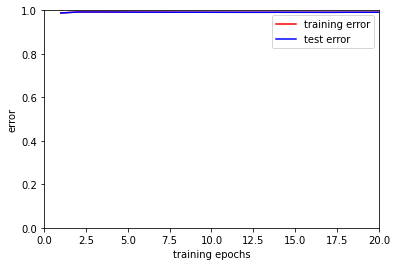

In [ ]:
plot_learning()